In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
X=np.array([[2.,3.],[2.,6.7],[2.,7.],[2.,7.5]],)
y = np.array([1.,1.,-1.,-1.]).reshape(4,1)
w=np.array([1.,1.,1.,1.])
w = w.reshape((4,1))
p = DecisionStumpClassifier()
p.train_decision_stump(X,w,y)
print("Threshold: " +str(p.threshold),"Feature index: " + str(p.feature))

Threshold: 6.70001 Feature index: 1


In [6]:
X=np.array([[2.,3.],[2.,6.7],[2.,7.],[2.,7.5]],)
y = np.array([-1.,1.,1.,-1.]).reshape(4,1)
w=np.array([100.,1.,1.,1.])
w = w.reshape((4,1))
p = DecisionStumpClassifier()
p.train_decision_stump(X,w,y)
print("Threshold: " +str(p.threshold),"Feature index: " + str(p.feature))

Threshold: 3.00001 Feature index: 1


In [7]:
class DecisionStumpClassifier:
    def __init__(self):
        self.loss = None
        self.threshold = None
        self.feature = None
        self.trained = False 
        self.direction = 0
    
    def train_decision_stump(self,X,w,y):
        #iterate features
        l_min = np.Inf
        threshold = 0
        feature = 0
        direc = None
        #iterate every feature
        for i in range(X.shape[1]):
            feature_vector = np.copy(X[:,i])
            w_vector = np.copy(w)
            y_vector = np.copy(y)
            
            arrinds = feature_vector.argsort()
            feature_vector = feature_vector[arrinds[::1]]
            w_vector = w_vector[arrinds[::1]]
            y_vector = y_vector[arrinds[::1]]
            
            #for every value, calculate the cost and decide the minimum
            for th in feature_vector:
                
                thr = th + 1.e-5
                [l,dire] = self.calc_loss(feature_vector,w_vector,y_vector,thr)
                if l < l_min:
                    #save the best feature and value calculated up to now
                    l_min = l
                    threshold = thr
                    feature = i
                    direc = dire
                    
        self.feature= feature
        self.threshold= threshold
        self.loss = l_min
        self.trained = True
        self.direction = direc
        
    def inner_cost(self,y_pred,y,w):
        dif = np.abs(y_pred-y)/2.
        dif = dif.reshape(dif.shape[0])
        w = w.reshape(w.shape[0])
        cost = np.dot(w,dif)
        
        return cost
    
    
    def calc_loss(self,x_feat,w,y,thr):
        
        direction = None
        c = np.ones((y.shape[0],1))
        c[x_feat>thr]=1
        c[x_feat<thr]=-1
        cost_1=self.inner_cost(c,y,w)
        
        #flip stump
        c[x_feat>thr]=-1
        c[x_feat<thr]=1
        cost_2=self.inner_cost(c,y,w)
        
        if cost_1 < cost_2:
            direction = 1
        else:
            direction = -1
        
        #return the minimum stump between the two computed
        return [np.minimum(cost_1,cost_2),direction]
    
    def predict(self,x):
        if self.trained == False:
            raise Exception('Model not trained')
        thr = self.threshold 
        x_feat = x[:,self.feature]
        c = np.ones((x.shape[0],1))
        if self.direction == 1:
            c[x_feat>thr]=1
            c[x_feat<thr]=-1
        else:
            c[x_feat>thr]=-1
            c[x_feat<thr]=1
        return c
    
    def predict_binary(self,x):
        pred = self.predict(x)
        pred = (pred+1)/2.
        return pred

In [8]:

cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]
n = 100
x_1 = np.random.multivariate_normal((0,0), cov1, n)
x_2 = np.random.multivariate_normal((0,2), cov2, n)

y_1 = np.zeros((n,1))
y_1 = y_1 - 1
y_2= np.ones((n,1))
x_1=np.append(x_1,y_1,axis=1)
x_2=np.append(x_2,y_2,axis=1)
x_total = np.append(x_1,x_2,axis=0)

Feature index: 1 Threshold: 1.2637004419411613 


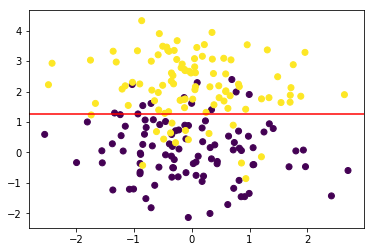

In [9]:
plt.scatter(x_total[:,0], x_total[:,1], c=x_total[:,2])

x = x_total[:,:-1]
y = x_total[:,-1].reshape(n*2,1)
w=np.ones((n*2,1))
d_stump = DecisionStumpClassifier()
d_stump.train_decision_stump(x,w,y)
plt.axhline(y=d_stump.threshold, color='r', linestyle='-')
format_dictionary = {'index': d_stump.feature, 'threshold': d_stump.threshold}
print("Feature index: {index} Threshold: {threshold} ".format(**format_dictionary))

Feature index: 1 Threshold: 1.2637004419411613 


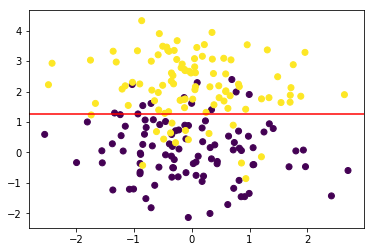

In [10]:
x_2[:,1] = x_2[:,1] # * 10
x_1[:,1] = x_1[:,1] #* 10
x_total = np.append(x_1,x_2,axis=0)
plt.scatter(x_total[:,0], x_total[:,1], c=x_total[:,2])
x = x_total[:,:-1]
y = x_total[:,-1].reshape(n*2,1)
w=np.ones((n*2,1))
d_stump = DecisionStumpClassifier()
d_stump.train_decision_stump(x,w,y)
plt.axhline(y=d_stump.threshold, color='r', linestyle='-')

format_dictionary = {'index': d_stump.feature, 'threshold': d_stump.threshold}
print("Feature index: {index} Threshold: {threshold} ".format(**format_dictionary))

In [11]:
np.cov(x_1[:,0],x_1[:,1])

array([[ 0.94276829, -0.11742578],
       [-0.11742578,  0.9787391 ]])

In [12]:
fashion = np.loadtxt(open("fashion57_train.txt", "rb"), delimiter=",")
y_1= np.ones((32,1))
y_2 = np.zeros((28,1))
y_2 = y_2 - 1
x = fashion
y = np.append(y_1,y_2,axis=0)
w = np.ones((y.shape[0],1))

In [13]:
d_stump = DecisionStumpClassifier()
d_stump.train_decision_stump(x,w,y)
format_dictionary = {'index': d_stump.feature, 'threshold': d_stump.threshold}
print("Feature index: {index} Threshold: {threshold} ".format(**format_dictionary))

Feature index: 106 Threshold: 0.05811 


In [14]:
fashion_test = np.loadtxt(open("fashion57_test.txt", "rb"), delimiter=",")
y_1_test= np.ones((195,1))
y_2_test = np.zeros((205,1))
y_2_test = y_2_test - 1
x_test = fashion_test
y_test = np.append(y_1_test,y_2_test,axis=0)
w_test = np.ones((y_test.shape[0],1)) 

print("Apparent Error: " + str(1-np.sum(d_stump.predict(x)==y)/y.shape[0]))
print("Test Error: " + str(1-np.sum(d_stump.predict(x_test)==y_test)/y_test.shape[0]))

Apparent Error: 0.18333333333333335
Test Error: 0.5075000000000001


In [15]:
class AdaBoost:
    def __init__(self,n_iter):
        self.b_t = np.zeros((n_iter,))
        self.h_t = np.empty(shape=(n_iter,), dtype=object)
        self.t = n_iter
        self.w = None

    def train(self,X,y):
        #initialy the distribution is 1/N
        T = self.t
        N = X.shape[0]
        w = np.full((N,1),1/N)
        y_binary = np.copy(y)
        y_binary = (y_binary+1)/2
        for i in range(T):
            p = w/np.sum(w)
            h = DecisionStumpClassifier()
            h.train_decision_stump(X,w,y)
            #save the models
            self.h_t[i]=h
            
            # h(x_t_i) in the paper
            h_pred_i = h.predict_binary(X)
            
            dif = np.abs(h_pred_i - y_binary)
            #e_t in the paper
            error = np.sum(np.multiply(p,dif))
            b = error/(1-error)
            self.b_t[i]=b
            w = np.multiply(w,np.power(b,1-dif))
            self.w = w
        return self.h_t
        
    def predict(self,obj):
        #This represents h_f - thi final hypothesis
        logb = np.log(1/self.b_t).reshape(1,self.b_t.shape[0])
        r_side = 0.5*np.sum(logb)
    
        lista = list(map(lambda m: m.predict_binary(obj),self.h_t))
        shape = list(lista[0].shape)
        shape[:0] = [len(lista)]
        arr = np.concatenate(lista).reshape(shape)
        arr = np.squeeze(arr)
        return 1.*(np.dot(logb,arr)>r_side).T

In [16]:
a = AdaBoost(15)

In [17]:
q = a.train(x,y)

In [18]:
ada_pred = a.predict(x)
ada_pred_test = a.predict(x_test)
y_binary_test = (y_test+1)/2
y_binary = (y+1)/2

In [19]:
print("Apparent Error: " + str(1-np.sum(ada_pred==y_binary)/y.shape[0]))
print("Test Error: " + str(1-np.sum(ada_pred_test==y_binary_test)/y_test.shape[0]))

Apparent Error: 0.0
Test Error: 0.35


In [20]:
#test f 
ada_c = AdaBoost(5)
q = ada_c.train(x,y)
ada_pred = ada_c.predict(x)

In [21]:
ada_c = AdaBoost(5)

In [22]:
cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]
n = 100
x_1 = np.random.multivariate_normal((0,0), cov1, n)
x_2 = np.random.multivariate_normal((0,2), cov2, n)

y_1 = np.zeros((n,1))
y_1 = y_1 - 1
y_2= np.ones((n,1))
x_1=np.append(x_1,y_1,axis=1)
x_2=np.append(x_2,y_2,axis=1)
x_total = np.append(x_1,x_2,axis=0)

In [23]:
x = x_total[:,:-1]
y = x_total[:,-1].reshape(n*2,1)
y_binary = (y+1)/2

In [24]:

print(np.sum(ada_c.predict(x) == y_binary)/y_binary.shape[0])

AttributeError: 'NoneType' object has no attribute 'predict_binary'

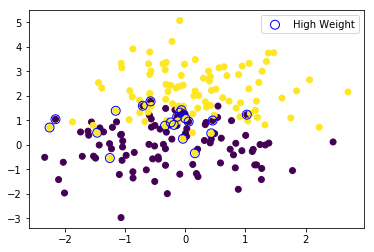

In [25]:
ada_c = AdaBoost(100)
q = ada_c.train(x,y)
ww = ada_c.w
indexes = ww.argsort(axis=0)[-20:][::-1]
plt.scatter(x_total[:,0], x_total[:,1], c=x_total[:,2])
plt.scatter(x_total[indexes,0], x_total[indexes,1],s=80,facecolors='none', color="blue",label="High Weight")
plt.legend(loc='upper right')

In [1460]:
print(indexes)

[[ 30]
 [  7]
 [193]
 [111]
 [137]
 [145]
 [ 91]
 [ 81]
 [117]
 [ 97]
 [ 47]
 [105]
 [ 25]
 [182]
 [ 54]
 [ 63]
 [172]
 [159]
 [ 45]
 [188]]


In [1483]:
#f


fashion = np.loadtxt(open("fashion57_train.txt", "rb"), delimiter=",")
y_1= np.ones((32,1))
y_2 = np.zeros((28,1))
y_2 = y_2 - 1
x = fashion
y = np.append(y_1,y_2,axis=0)
w = np.ones((y.shape[0],1))
y_binary = (y+1)/2.


fashion_test = np.loadtxt(open("fashion57_test.txt", "rb"), delimiter=",")
y_1_test= np.ones((195,1))
y_2_test = np.zeros((205,1))
y_2_test = y_2_test - 1

x_test = fashion_test
y_test = np.append(y_1_test,y_2_test,axis=0)
w_test = np.ones((y_test.shape[0],1)) 
y_test_binary = (y_test+1)/2

In [1464]:
T = np.array([2,3,4,5,6,7,8,9,10, 14, 20, 26, 32, 38, 44, 50, 56])
apparent_acc = np.zeros((T.shape[0],1))
test_acc = np.zeros((T.shape[0],1))
for i,t in enumerate(T):
    ada_c = AdaBoost(t)
    q = ada_c.train(x,y)
    acc_train = np.sum(ada_c.predict(x) == y_binary)/x.shape[0]
    acc_test = np.sum(ada_c.predict(x_test) == y_test_binary)/x_test.shape[0]
    print("t: " + str(t) + " Apparent Accuracy: " + str(acc_train) + " Test Accuracy: " + str(acc_test))
    apparent_acc[i] = acc_train
    test_acc[i] = acc_test

t: 56 Apparent Accuracy: 1.0 Test Accuracy: 0.725


In [1475]:
T = np.array([2,3,4,5,6,7,8,9,10, 14, 20, 26, 32, 38, 44, 50, 56])
training1_acc = np.array([0.816,0.933,0.95,0.983,0.966,1,1,1,1,1,1,1,1,1,1,1,1])
test1_acc = np.array([0.492,0.645,0.647,0.645,0.655,0.634,0.625,0.6175,0.64,0.62,0.67,0.7025,0.715,0.715,0.7175,0.7075,0.725])

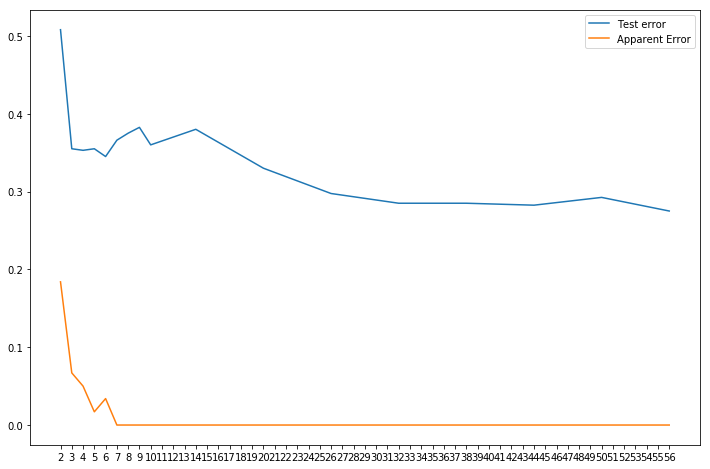

In [1477]:
plt.xticks(np.arange(min(T), max(T)+1, 1.0))
plt.plot(T,1-test1_acc,label="Test error")
plt.plot(T,1-training1_acc, label="Apparent Error")
plt.legend(loc='upper right')

In [1470]:
ww = ada_c.w
indexes = ww.argsort(axis=0)[-20:][::-1]
print(indexes)

[[14]
 [ 5]
 [54]
 [39]
 [50]
 [38]
 [36]
 [24]
 [46]
 [56]
 [30]
 [51]
 [35]
 [33]
 [57]
 [44]
 [18]
 [19]
 [ 0]
 [ 9]]


In [ ]:
indexes = w.argsort(axis=0)[-5:][::-1]
indexes

In [1484]:
#h
n = np.array([2,4,6,10,15,20])
apparent_acc = np.zeros((n.shape[0],1))
test_acc = np.zeros((n.shape[0],1))
for i,j in enumerate(n):
    ic1 = np.random.choice(y_1.shape[0], j, replace=False)
    ic2 = np.random.choice(y_2.shape[0], j, replace=False)+32
    ic = np.append(ic1,ic2)
    x_train = x[ic,:].copy()
    y_train = y[ic].copy()
    y_train_binary = y_binary[ic].copy()
    ada_c = AdaBoost(56)
    q = ada_c.train(x_train,y_train)
    acc_train = np.sum(ada_c.predict(x_train) == y_train_binary)/x_train.shape[0]
    acc_test = np.sum(ada_c.predict(x_test) == y_test_binary)/x_test.shape[0]
    print("n: " + str(j) + " Apparent Accuracy: " + str(acc_train) + " Test Accuracy: " + str(acc_test))
    apparent_acc[i] = acc_train
    test_acc[i] = acc_test
    

n: 2 Apparent Accuracy: 0.5 Test Accuracy: 0.5125
n: 4 Apparent Accuracy: 0.5 Test Accuracy: 0.5125
n: 6 Apparent Accuracy: 0.5 Test Accuracy: 0.5125
n: 10 Apparent Accuracy: 1.0 Test Accuracy: 0.5875
n: 15 Apparent Accuracy: 1.0 Test Accuracy: 0.6475
n: 20 Apparent Accuracy: 1.0 Test Accuracy: 0.695


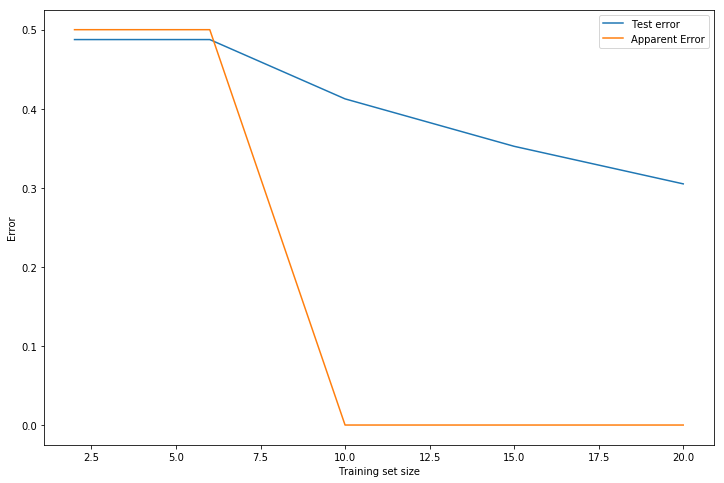

In [1488]:
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.plot(n,1-test_acc,label="Test error")
plt.plot(n,1-apparent_acc, label="Apparent Error")
plt.legend(loc='upper right')


In [1338]:
x_train

array([[0.062131 , 0.06426  , 0.0051545, ..., 0.087954 , 0.020482 ,
        0.089942 ],
       [0.063684 , 0.067671 , 0.038424 , ..., 0.070407 , 0.075454 ,
        0.036759 ],
       [0.044892 , 0.010731 , 0.010294 , ..., 0.011693 , 0.046496 ,
        0.055433 ],
       [0.024924 , 0.019708 , 0.039469 , ..., 0.066521 , 0.073009 ,
        0.040395 ]])

In [1343]:
x_train.shape

(4, 784)

In [1342]:
y.shape

(60, 1)